In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\apopalzi\Documents\git\apf\datasets\fraud\phishing_detection\data\dataset_phishing.csv')
df.head().T

,0,1,2,3,4
url,http://www.crestonwood.com/router.php,http://shadetreetechnology.com/V4/validation/a...,https://support-appleld.com.secureupdate.duila...,http://rgipt.ac.in,http://www.iracing.com/tracks/gateway-motorspo...
length_url,37,77,126,18,55
length_hostname,19,23,50,11,15
ip,0,1,1,0,0
nb_dots,3,1,4,2,2
...,...,...,...,...,...
web_traffic,0,0,5828815,107721,8725
dns_record,1,0,0,0,0
google_index,1,1,1,0,0
page_rank,4,2,0,3,6


In [4]:
df.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

# Data Preparation

In [5]:
df.drop('url',axis = 1,inplace = True)

In [6]:
#Encode target column
df['status'] = df['status'].replace(['legitimate','phishing'],[0,1])

In [7]:
#check for missing data
df.isna().sum().nlargest(10)

length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
nb_at              0
nb_qm              0
nb_and             0
nb_or              0
nb_eq              0
dtype: int64

# EDA

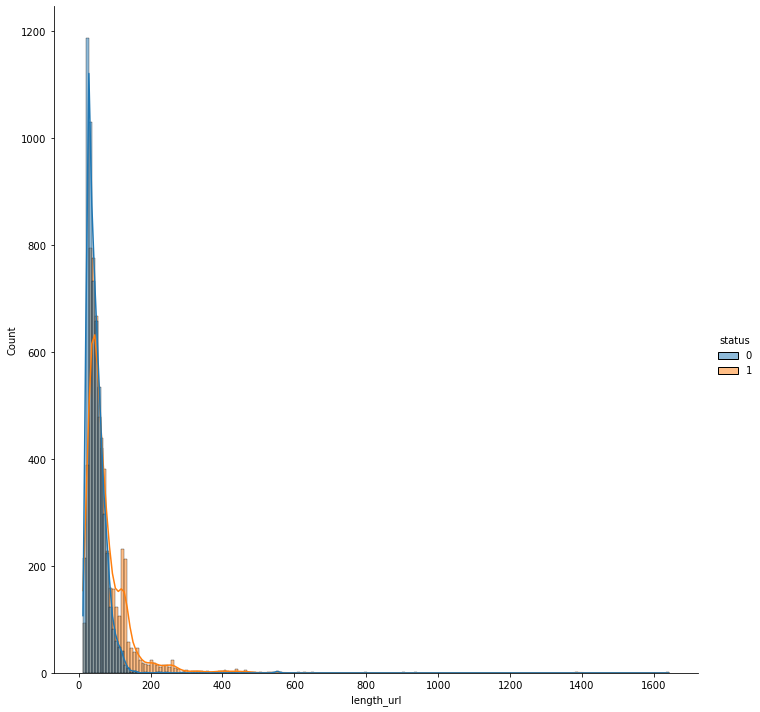

In [8]:
sns.displot(df, x="length_url", hue="status",height = 10,aspect = 1, kde = True, bins = 200)

The longer the length of the URL site, the higher the chance that it is a phishing website. Legitimate (0) websites have URL lengths that fall in the 0-200 range

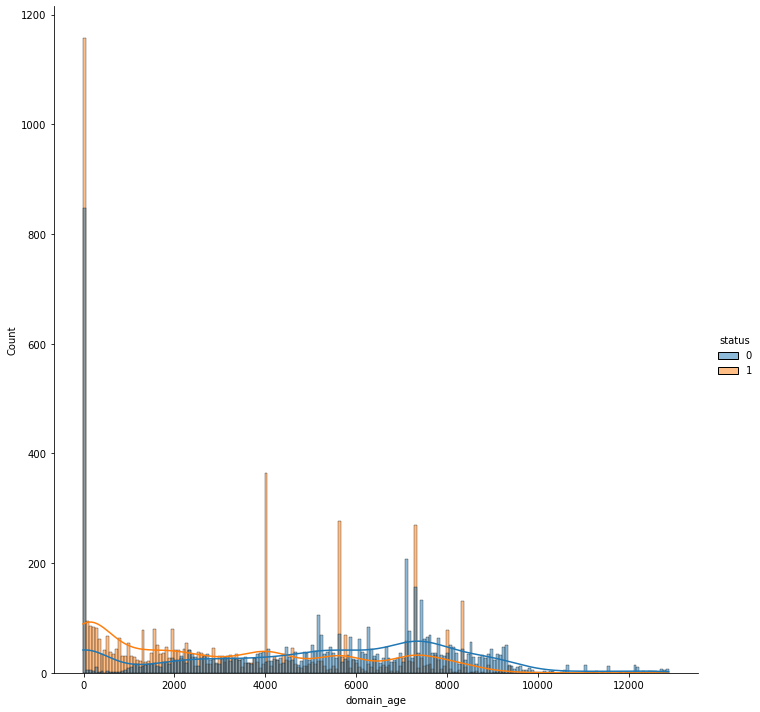

In [9]:
sns.displot(df, x="domain_age", hue="status",height = 10,aspect = 1, kde = True, bins = 200)

A similar trend can be see here. Websites with a smaller domain_age are likely to be phishing websites. 

C:\Users\apopalzi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


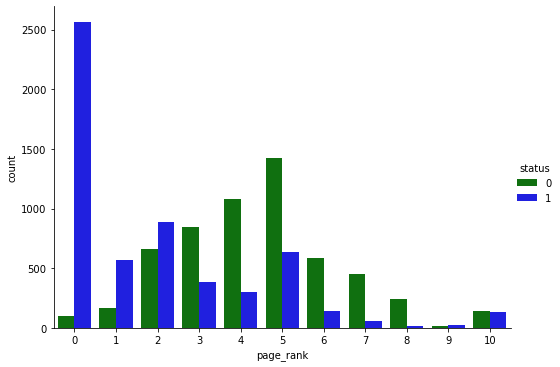

In [10]:
sns.catplot("page_rank", hue="status", data=df, kind="count", 
            palette={0:"green", 1:"blue"} ,height=5.0, aspect=11.7/8.27 )

Legitimate URLS form a gaussian distribution as page rank increases. Phishing URLs showing a right skewed distribution - The lower the page rank, the higher the likelihood that the URL is not legitimate

<AxesSubplot:ylabel='Correlation with target variable'>

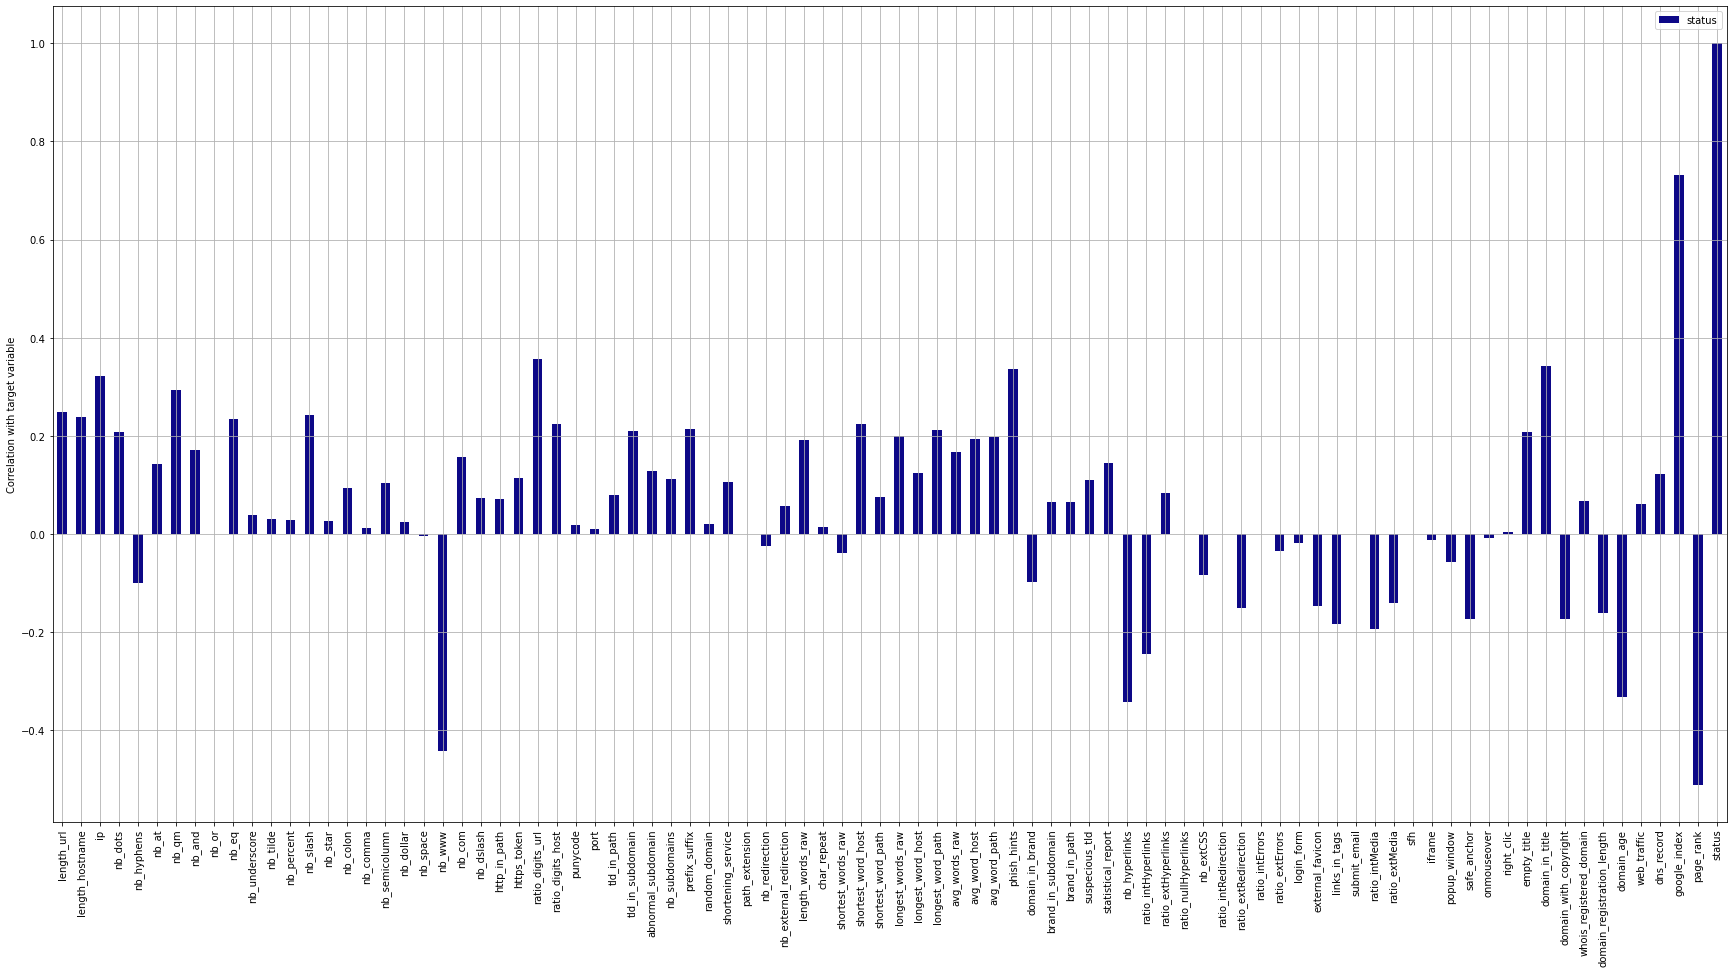

In [11]:
correlation = df.corr()['status']
pd.DataFrame(data = correlation).plot(kind = 'bar',figsize = (30,15),ylabel = 'Correlation with target variable',cmap = 'plasma',grid = True) 

# Modelling

In [12]:
#import ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score

In [13]:
#split data into X and y
X = df.drop('status',axis=1)
y = df['status']

In [14]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [15]:
#Choose the right models
models = {'LogisticRegression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'RandomForestClassifier':RandomForestClassifier()}
model_results = {}

In [16]:
for model_name,model in models.items():
    print(f'Fitting {model_name}......')
    model.fit(X_train,y_train)
    print('')
    print(f'Scoring {model_name}....')
    print('')
    model_results[model_name] = model.score(X_test,y_test)

Fitting LogisticRegression......

Scoring LogisticRegression....

Fitting KNN......

Scoring KNN....

Fitting RandomForestClassifier......

Scoring RandomForestClassifier....



In [17]:
model_results
model_compare = pd.DataFrame(model_results,index = ['accuracy'])
model_compare

,LogisticRegression,KNN,RandomForestClassifier
accuracy,0.787839,0.820647,0.967629


<AxesSubplot:>

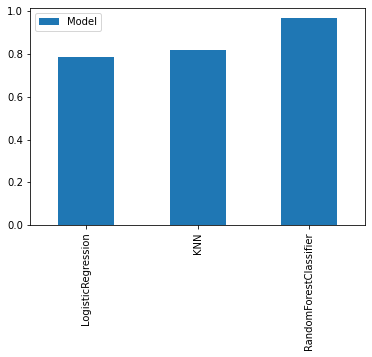

In [18]:
model_compare = pd.DataFrame(model_results,index = ['Model'])
model_compare.T.plot.bar() 

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictive_charges= model.predict(X_test)
print(predictive_charges)

[0 0 0 ... 1 0 1]


<AxesSubplot:>

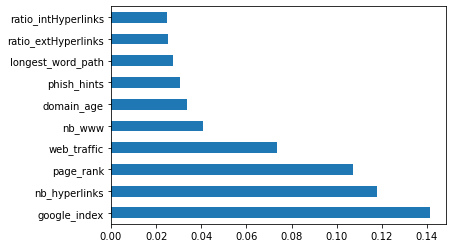

In [30]:


(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [20]:
final_df = X_test.copy()

In [21]:
final_df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
7529,35,11,0,2,0,0,0,0,0,0,...,0,1,1,0,3571,11039,178542,0,0,5
11221,22,15,0,2,0,0,0,0,0,0,...,0,1,1,0,0,-1,0,0,0,2
4889,43,15,0,2,1,0,1,0,0,1,...,0,0,1,0,208,5636,2,0,0,10
8962,26,18,0,2,0,0,0,0,0,0,...,0,1,0,0,983,1938,2636665,0,0,4
4004,62,13,0,2,1,0,1,0,0,1,...,0,1,0,0,338,1853,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,128,50,1,4,1,0,1,2,0,3,...,0,1,1,0,25,3993,5707171,0,1,0
6013,48,39,0,2,1,0,0,0,0,0,...,0,1,1,0,573,523,8721545,0,0,3
1224,33,14,0,2,0,0,0,0,0,0,...,0,1,0,0,2430,1953,4365,0,1,3
5157,67,15,0,2,2,0,0,0,0,0,...,0,1,1,0,1417,5887,184,0,0,6


In [22]:
final_df['Predicted Outcome'] = predictive_charges

In [23]:
final_df['Actual Outcome'] = y_test
final_df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,Predicted Outcome,Actual Outcome
7529,35,11,0,2,0,0,0,0,0,0,...,1,0,3571,11039,178542,0,0,5,0,0
11221,22,15,0,2,0,0,0,0,0,0,...,1,0,0,-1,0,0,0,2,0,0
4889,43,15,0,2,1,0,1,0,0,1,...,1,0,208,5636,2,0,0,10,0,0
8962,26,18,0,2,0,0,0,0,0,0,...,0,0,983,1938,2636665,0,0,4,0,0
4004,62,13,0,2,1,0,1,0,0,1,...,0,0,338,1853,0,0,1,2,1,1


In [24]:
final_df['Predicted Outcome'] = final_df['Predicted Outcome'].replace([0,1],['legitimate','Phishing'])
final_df['Actual Outcome'] = final_df['Actual Outcome'].replace([0,1],['legitimate','Phishing'])


In [25]:
final_df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,Predicted Outcome,Actual Outcome
7529,35,11,0,2,0,0,0,0,0,0,...,1,0,3571,11039,178542,0,0,5,legitimate,legitimate
11221,22,15,0,2,0,0,0,0,0,0,...,1,0,0,-1,0,0,0,2,legitimate,legitimate
4889,43,15,0,2,1,0,1,0,0,1,...,1,0,208,5636,2,0,0,10,legitimate,legitimate
8962,26,18,0,2,0,0,0,0,0,0,...,0,0,983,1938,2636665,0,0,4,legitimate,legitimate
4004,62,13,0,2,1,0,1,0,0,1,...,0,0,338,1853,0,0,1,2,Phishing,Phishing


# Convert Output to CSV

In [26]:
#df_predict_phishing = pd.DataFrame(final_df)
#file_name = r'C:\Users\apopalzi\Documents\git\apf\output\fraud\predict_phishing\predict_phishing.csv'
#df_predict_phishing.to_csv(file_name,encoding='utf-8', index=False)